## The purpose of this note book is to figure out how to implement Gibbs sampling for 𝜏 (σ)

In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl

In [68]:
def randtau(r,P,k,lamb,t,V, K0):
    a_tau = 1
    b_tau = 1e-4  

    dr = r[1] - r[0]

    # Background
    B = dl.bg_exp(t,k) 

    # Kernel
    Kintra = (1-lamb)+lamb*K0
    K = Kintra * B[:, np.newaxis]
    K = V0*K*dr

    M = len(V)
    a_ = a_tau + M/2
    b_ = b_tau + (1/2)*np.linalg.norm((K@P-V))**2

    tau_draw =  np.random.gamma(a_, 1/b_, 1)[0]

    return tau_draw

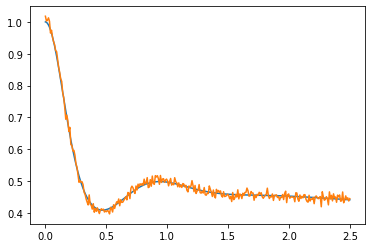

In [25]:
r = np.linspace(1,8,200)
t = np.linspace(0,2.5,300)

dr = r[1] - r [0]

P = dl.dd_gauss(r,[3.5, 0.3])

k = 0.05
lamb = 0.5
V0 = 1

B = dl.bg_exp(t,k)

K0 =  dl.dipolarkernel(t,r,integralop=False)

Kintra = (1-lamb)+lamb*K0
K = Kintra * B[:, np.newaxis]
K = V0*K*dr

V = K@P
Vexp = V + dl.whitegaussnoise(t,0.01,seed=0)

plt.plot(t,V,t,Vexp);

In [67]:
tau = randtau(r, P, k, lamb, t, Vexp, K0)
sigma = 1/np.sqrt(tau)

print(tau,sigma)

2.343682046325095 0.6532067342077397
